# 직접 해보세요!
## melt 메서드 사용하기(151쪽)

### 1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

In [2]:
import pandas as pd
pew = pd.read_csv('../data/pew.csv')
print(pew.head())

             religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k  \
0            Agnostic     27       34       60       81       76      137   
1             Atheist     12       27       37       52       35       70   
2            Buddhist     27       21       30       34       33       58   
3            Catholic    418      617      732      670      638     1116   
4  Don’t know/refused     15       14       15       11       10       35   

   $75-100k  $100-150k  >150k  Don't know/refused  
0       122        109     84                  96  
1        73         59     74                  76  
2        62         39     53                  54  
3       949        792    633                1489  
4        21         17     18                 116  


In [3]:
print(pew.iloc[:, 0:6])

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k
0                  Agnostic     27       34       60       81       76
1                   Atheist     12       27       37       52       35
2                  Buddhist     27       21       30       34       33
3                  Catholic    418      617      732      670      638
4        Don’t know/refused     15       14       15       11       10
5          Evangelical Prot    575      869     1064      982      881
6                     Hindu      1        9        7        9       11
7   Historically Black Prot    228      244      236      238      197
8         Jehovah's Witness     20       27       24       24       21
9                    Jewish     19       19       25       25       30
10            Mainline Prot    289      495      619      655      651
11                   Mormon     29       40       48       51       56
12                   Muslim      6        7        9       10        9
13    

In [4]:
pew_long = pd.melt(pew, id_vars='religion')
print(pew_long.head())

             religion variable  value
0            Agnostic    <$10k     27
1             Atheist    <$10k     12
2            Buddhist    <$10k     27
3            Catholic    <$10k    418
4  Don’t know/refused    <$10k     15


In [6]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
print(pew_long.head())

             religion income  count
0            Agnostic  <$10k     27
1             Atheist  <$10k     12
2            Buddhist  <$10k     27
3            Catholic  <$10k    418
4  Don’t know/refused  <$10k     15


long 데이터 이용, 종교별 평균 수익 구하기 

In [8]:
pl = pew_long



pl.loc[pl["income"] == "<$10k","income"] = 10
pl.loc[pl["income"] == "$10-20k","income"] = 15
pl.loc[pl["income"] == "$20-30k","income"] = 25
pl.loc[pl["income"] == "$30-40k","income"] = 35
pl.loc[pl["income"] == "$40-50k","income"] = 45
pl.loc[pl["income"] == "$50-75k","income"] = 65
pl.loc[pl["income"] == "$75-100k","income"] = 85
pl.loc[pl["income"] == "$100-150k","income"] = 125
pl.loc[pl["income"] == ">150k","income"] = 150

pl

pl= pl[pl['income'] != "Don't know/refused"]

In [9]:
pl

,religion,income,count
0,Agnostic,10,27
1,Atheist,10,12
2,Buddhist,10,27
3,Catholic,10,418
4,Don’t know/refused,10,15
...,...,...,...
157,Orthodox,150,46
158,Other Christian,150,12
159,Other Faiths,150,41
160,Other World Religions,150,4


In [10]:
pl['income'] = pd.to_numeric(pl['income'])
pl['total'] = pl["income"] * pl["count"]
pl

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,religion,income,count,total
0,Agnostic,10,27,270
1,Atheist,10,12,120
2,Buddhist,10,27,270
3,Catholic,10,418,4180
4,Don’t know/refused,10,15,150
...,...,...,...,...
157,Orthodox,150,46,6900
158,Other Christian,150,12,1800
159,Other Faiths,150,41,6150
160,Other World Religions,150,4,600


In [13]:
pl['result']=pl['total']/pl['count']



pl






,income,count,total,result
religion,,,,
Agnostic,555,730,54035,74.020548
Atheist,555,439,34075,77.619590
Buddhist,555,357,25875,72.478992
Catholic,555,6565,431050,65.658797
Don’t know/refused,555,156,10455,67.019231
Evangelical Prot,555,7943,449130,56.544127
Hindu,555,220,21435,97.431818
Historically Black Prot,555,1656,76490,46.189614
Jehovah's Witness,555,178,8490,47.696629


### 5. 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [14]:
billboard = pd.read_csv('../data/billboard.csv')

print(billboard.iloc[0:5, 0:16])

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5   wk6   wk7   wk8   wk9  wk10  wk11  
0  72.0  77.0  87.0  94.0  99.0   NaN   NaN   NaN   NaN  
1  92.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  68.0  67.0  66.0  57.0  54.0  53.0  51.0  51.0  51.0  
3  72.0  69.0  67.0  65.0  55.0  59.0  62.0  61.0  61.0  
4  25.0  17.0  17.0  31.0  36.0  49.0  53.0  57.0  64.0  


In [16]:
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

print(billboard_long.head())

   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


# 직접 해보세요!
## ebola 데이터 집합 살펴보기(155쪽)

In [17]:
ebola = pd.read_csv('../data/country_timeseries.csv')
print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [18]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [19]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long.head())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


# 직접 해보세요!
## 열 이름 분리하고 데이터프레임에 추가하기(156쪽)

In [21]:
variable_split = ebola_long.variable.str.split('_')


print(variable_split[:5])

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [23]:
print(type(variable_split))

<class 'pandas.core.series.Series'>


In [24]:
print(type(variable_split[0]))

<class 'list'>


In [25]:
status_values = variable_split.str.get(0) 
country_values = variable_split.str.get(1)

print(status_values[:5])

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: variable, dtype: object


In [26]:
print(status_values[-5:])

1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object


In [27]:
print(country_values[:5])

0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: variable, dtype: object


In [28]:
print(country_values[-5:])

1947    Mali
1948    Mali
1949    Mali
1950    Mali
1951    Mali
Name: variable, dtype: object


In [29]:
ebola_long['status'] = status_values 
ebola_long['country'] = country_values
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


# 알아두면 좋아요!
## concat 메서드를 응용하여 데이터프레임에 열 추가하기(159쪽)

In [18]:
variable_split = ebola_long.variable.str.split('_', expand=True) 
variable_split.columns = ['status', 'country'] 
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)

print(ebola_parsed.head())

         Date  Day      variable   value status country status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea  Cases  Guinea


# 직접 해보세요!
## 기상 데이터의 여러 열을 하나로 정리하기 ─ melt, pivot_table 메서드(160쪽)

In [26]:
weather = pd.read_csv('../data/weather.csv') 
print(weather.iloc[:5, :11])

        id  year  month element  d1    d2    d3  d4    d5  d6  d7
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN NaN
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN NaN
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN NaN
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN NaN
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN NaN


In [27]:
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp') 
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


In [28]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year', 'month', 'day'], 
    columns='element', 
    values='temp'
)

print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d1    NaN   NaN
                   d10   NaN   NaN
                   d11   NaN   NaN
                   d12   NaN   NaN
                   d13   NaN   NaN
                   d14   NaN   NaN
                   d15   NaN   NaN
                   d16   NaN   NaN
                   d17   NaN   NaN
                   d18   NaN   NaN
                   d19   NaN   NaN
                   d2    NaN   NaN
                   d20   NaN   NaN
                   d21   NaN   NaN
                   d22   NaN   NaN
                   d23   NaN   NaN
                   d24   NaN   NaN
                   d25   NaN   NaN
                   d26   NaN   NaN
                   d27   NaN   NaN
                   d28   NaN   NaN
                   d29   NaN   NaN
                   d3    NaN   NaN
                   d30  27.8  14.5
                   d31   NaN   NaN
                   d4    NaN   NaN
                   d

In [22]:
weather_tidy_flat = weather_tidy.reset_index() 
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1   d1   NaN   NaN
1        MX17004  2010      1  d10   NaN   NaN
2        MX17004  2010      1  d11   NaN   NaN
3        MX17004  2010      1  d12   NaN   NaN
4        MX17004  2010      1  d13   NaN   NaN


In [64]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
ebola.iloc[:5, [0, 1, 2, 3, 10, 11]]

ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()


#str을 넣으면 string에서만 쓸 수 있던 split과 같은 함수를 사용가능
variable_split = ebola_long.variable.str.split('_')

print(variable_split[:5])


status_values = variable_split.str.get(0) 
country_values = variable_split.str.get(1)



ebola_long['status'] = status_values 
ebola_long['country'] = country_values

temp = ebola_long.drop('variable', 1)

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [80]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [72]:
ebola.iloc[:5, [0, 1, 2, 3, 10, 11]]

ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()


#str을 넣으면 string에서만 쓸 수 있던 split과 같은 함수를 사용가능
variable_split = ebola_long.variable.str.split('_')

print(variable_split[:5])


status_values = variable_split.str.get(0) 
country_values = variable_split.str.get(1)



ebola_long['status'] = status_values 
ebola_long['country'] = country_values

temp = ebola_long.drop('variable', 1)

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [78]:
temp

,Date,Day,value,status,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [79]:
ebola


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
temp

,Date,Day,value,status,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [196]:
cases = temp[temp['status'] == "Cases"]
deaths = temp[temp['status'] == "Deaths"]

cases.groupby('country')['value'].sum()
deaths.groupby('country')['value'].sum()

cases.rename(columns = {'value' : 'cases'}, inplace = True)
cases

deaths.rename(columns = {'value' : 'deaths'}, inplace = True)
deaths



merged = cases.merge(deaths,on=['Date','Day','country'])

merged

merged['deathRate'] = (merged["deaths"] / merged["cases"])*100

merged


merged['Date2'] = pd.to_datetime(merged['Date'])









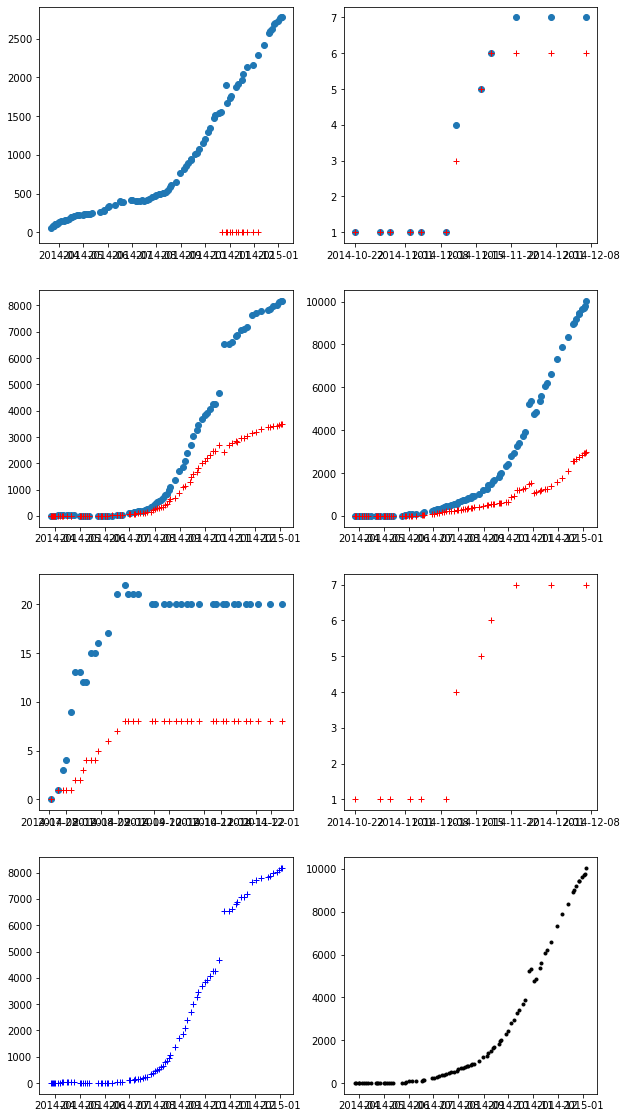

In [214]:
import seaborn as sns 

%matplotlib inline
import matplotlib.pyplot as plt

dataset_1 = merged[merged['country']=='Guinea']
dataset_2 = merged[merged['country'] == 'Mali'] 
dataset_3 = merged[merged['country'] == 'Liberia'] 
dataset_4 = merged[merged['country'] == 'SierraLeone']
dataset_5 = merged[merged['country'] == 'Nigeria']
dataset_6 = merged[merged['country'] == 'Senegal']
dataset_7 = merged[merged['country'] == 'UnitedStates']
dataset_8 = merged[merged['country'] == 'Spain']



fig = plt.figure(figsize=(10, 20))
axes1 = fig.add_subplot(4, 2, 1)
axes2 = fig.add_subplot(4, 2, 2)
axes3 = fig.add_subplot(4, 2, 3)
axes4 = fig.add_subplot(4, 2, 4)
axes5 = fig.add_subplot(4, 2, 5)
axes6 = fig.add_subplot(4, 2, 6)
axes7 = fig.add_subplot(4, 2, 7)
axes8 = fig.add_subplot(4, 2, 8)




axes1.plot(dataset_1['Date2'], dataset_1['cases'], 'o') 
axes1.plot(dataset_2['Date2'], dataset_2['deaths'], 'r+') 

axes2.plot(dataset_2['Date2'], dataset_2['cases'], 'o')
axes2.plot(dataset_2['Date2'], dataset_2['deaths'], 'r+') 

axes3.plot(dataset_3['Date2'], dataset_3['cases'], 'o')
axes3.plot(dataset_3['Date2'], dataset_3['deaths'], 'r+') 


axes4.plot(dataset_4['Date2'], dataset_4['cases'], 'o')
axes4.plot(dataset_4['Date2'], dataset_4['deaths'], 'r+') 

axes5.plot(dataset_5['Date2'], dataset_5['cases'], 'o') 
axes5.plot(dataset_5['Date2'], dataset_5['deaths'], 'r+') 

axes6.plot(dataset_2['Date2'], dataset_2['cases'], 'r+') 

axes7.plot(dataset_3['Date2'], dataset_3['cases'], 'b+') 

axes8.plot(dataset_4['Date2'], dataset_4['cases'], 'k.')





In [ ]:
facet = sns.FacetGrid(merged, col='day', hue='sex',col_wrap=2) #hue='sex' 성별로 다르게 색깔을 칠하겠다. 
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet.add_legend()
facet_to_lm = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, col='day',col_wrap=2, hue='sex', size=3, scatter_kws=("s":100))
facet_to_lm = facet_to_lm.add_legend() 

In [153]:
merged['country'].unique()

array(['Guinea', 'Liberia', 'SierraLeone', 'Nigeria', 'Senegal',
       'UnitedStates', 'Spain', 'Mali'], dtype=object)

In [85]:
ebola


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 직접 해보세요!
## 빌보드 차트의 중복 데이터 처리하기(163쪽)

In [23]:
billboard = pd.read_csv('../data/billboard.csv')
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

print(billboard_long.shape)

print(billboard_long.head())

(24092, 7)
   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


In [24]:
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [25]:
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']] 
print(billboard_songs.shape)

(24092, 4)


In [26]:
billboard_songs = billboard_songs.drop_duplicates() 
print(billboard_songs.shape)

(317, 4)


In [27]:
billboard_songs['id'] = range(len(billboard_songs)) 
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [28]:
billboard_ratings = billboard_long.merge( billboard_songs, on=['year', 'artist', 'track', 'time']) 
print(billboard_ratings.shape)

(24092, 8)


In [29]:
print(billboard_ratings.head())

   year artist                    track  time date.entered week  rating  id
0  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0   0
1  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk2    82.0   0
2  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk3    72.0   0
3  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk4    77.0   0
4  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk5    87.0   0


# 직접 해보세요!
## 뉴욕 택시 데이터 준비(166쪽)

In [32]:
import os 
import urllib.request

# 네트워크 상태에 따라 5 ~ 15분이 소요됩니다.
with open('../data/raw_data_urls.txt', 'r') as data_urls:
    for line, url in enumerate(data_urls):
        if line == 5:
            break 
        fn = url.split('/')[-1].strip()
        fp = os.path.join('', '../data', fn)
        print(url)
        print(fp)
        urllib.request.urlretrieve(url, fp)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

../data\fhv_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv

../data\fhv_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv

../data\fhv_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv

../data\fhv_tripdata_2015-04.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv

../data\fhv_tripdata_2015-05.csv


In [37]:
import glob 
nyc_taxi_data = glob.glob('../data/fhv_*') 
print(nyc_taxi_data)

['../data\\fhv_tripdata_2015-01.csv', '../data\\fhv_tripdata_2015-02.csv', '../data\\fhv_tripdata_2015-03.csv', '../data\\fhv_tripdata_2015-04.csv', '../data\\fhv_tripdata_2015-05.csv']


In [38]:
taxi1 = pd.read_csv(nyc_taxi_data[0]) 
taxi2 = pd.read_csv(nyc_taxi_data[1]) 
taxi3 = pd.read_csv(nyc_taxi_data[2]) 
taxi4 = pd.read_csv(nyc_taxi_data[3]) 
taxi5 = pd.read_csv(nyc_taxi_data[4])

In [39]:
print(taxi1.head(n=2)) 
print(taxi2.head(n=2)) 
print(taxi3.head(n=2)) 
print(taxi4.head(n=2)) 
print(taxi5.head(n=2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [40]:
print(taxi1.shape) 
print(taxi2.shape) 
print(taxi3.shape) 
print(taxi4.shape) 
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


In [41]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])

print(taxi.shape)

(17367717, 3)


taxi 00:00:00 ~ 05:00:00 까지 locationID가 결측이 아닌 것 뽑기 

In [42]:
taxi.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [43]:
taxi['Pickup_date'] = pd.to_datetime(taxi['Pickup_date'])
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17367717 entries, 0 to 4296066
Data columns (total 3 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Pickup_date           datetime64[ns]
 2   locationID            float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 530.0+ MB


In [44]:
temp = taxi.head()
standard = pd.Series(['00:00:00', '05:00:00'])
standard
# temp[temp['Pickup_date'].dt.time > '00:00:00'.dt.time]

0    00:00:00
1    05:00:00
dtype: object

In [45]:
taxi.head()

,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [53]:
taxi['pickup_hour']= taxi['Pickup_date'].dt.hour         # HH:MM:SS(문자)

In [54]:
taxi.head()

,Dispatching_base_num,Pickup_date,locationID,pickup_time,pickup_hour
0,B00013,2015-01-01 00:30:00,NaN,00:30:00,0
1,B00013,2015-01-01 01:22:00,NaN,01:22:00,1
2,B00013,2015-01-01 01:23:00,NaN,01:23:00,1
3,B00013,2015-01-01 01:44:00,NaN,01:44:00,1
4,B00013,2015-01-01 02:00:00,NaN,02:00:00,2


In [63]:
taxi= taxi[(taxi['pickup_hour'] <=5) & taxi.locationID.notna()]

taxi

,Dispatching_base_num,Pickup_date,locationID,pickup_time,pickup_hour
20940,B00053,2015-01-03 00:10:00,90.0,00:10:00,0
21049,B00053,2015-01-06 00:00:00,129.0,00:00:00,0
21050,B00053,2015-01-06 00:16:00,162.0,00:16:00,0
21051,B00053,2015-01-06 00:20:00,265.0,00:20:00,0
21052,B00053,2015-01-06 00:58:00,162.0,00:58:00,0
...,...,...,...,...,...
4294826,B02808,2015-05-15 00:01:00,264.0,00:01:00,0
4294827,B02808,2015-05-15 00:01:00,264.0,00:01:00,0
4294847,B02808,2015-05-16 00:44:00,264.0,00:44:00,0
4294937,B02808,2015-05-23 00:44:00,264.0,00:44:00,0


# 알아두면 좋아요!
## 반복문으로 데이터 준비하기(169쪽)

In [31]:
list_taxi_df = [] 

for csv_filename in nyc_taxi_data:
    # print(csv_filename)
    df = pd.read_csv(csv_filename)
    list_taxi_df.append(df) 

print(len(list_taxi_df))

NameError: name 'nyc_taxi_data' is not defined

In [40]:
print(type(list_taxi_df[0]))

<class 'pandas.core.frame.DataFrame'>


In [30]:
print(list_taxi_df[0].head())

NameError: name 'list_taxi_df' is not defined

In [42]:
taxi_loop_concat = pd.concat(list_taxi_df) 
print(taxi_loop_concat.shape)

(17367717, 3)


In [ ]:
print(taxi.equals(taxi_loop_concat))

eval ('df') : 기 생성된 python 객체를 문자열로 호출? 
exec : 문자열로 된 파이썬 문장을 실행시킴 